In [1]:
import numpy as np
import pandas_datareader.data as reader
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("seaborn")
mpl.rcParams["font.family"] = 'serif'
%matplotlib inline

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

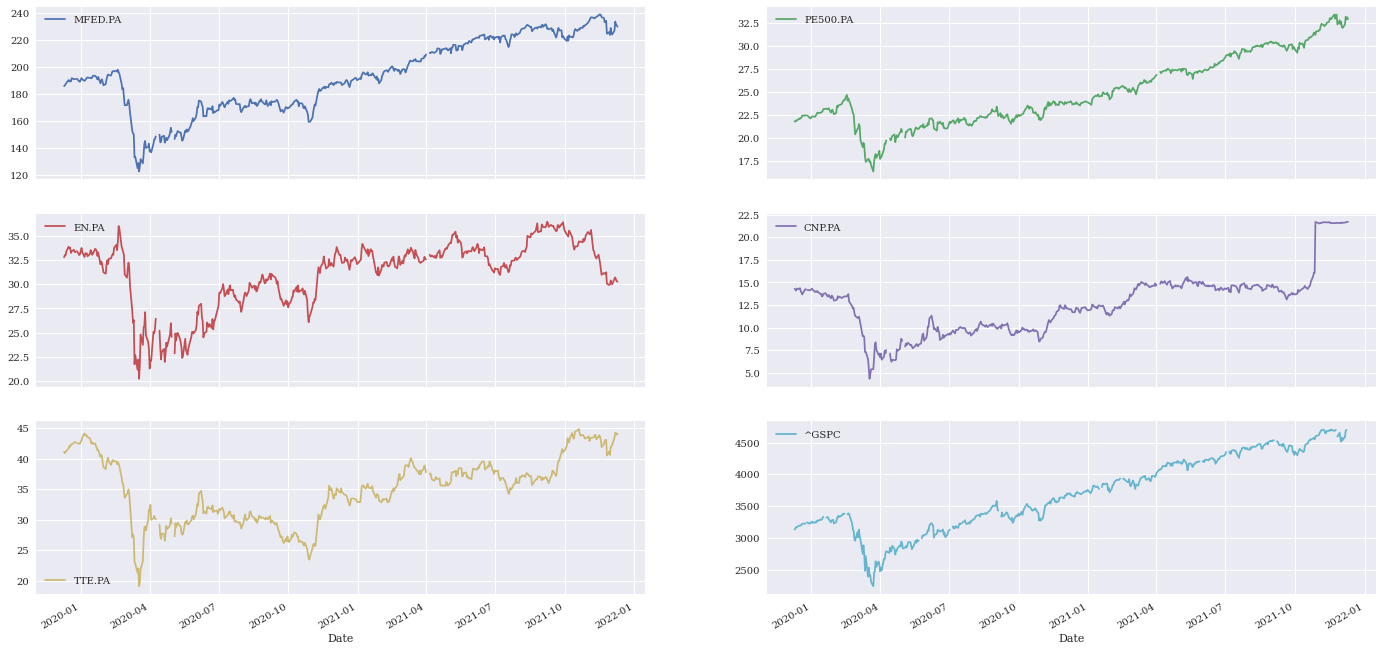

In [2]:
end = dt.datetime.now()
start = dt.date(end.year - 2, end.month, end.day)
stocks = ["MFED.PA", "PE500.PA", "EN.PA", "CNP.PA", "TTE.PA", "^GSPC"]

df = reader.get_data_yahoo(stocks, start, end)["Adj Close"]
df.plot(figsize=(24, 12), subplots=True, layout=(3, 2))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 519 entries, 2019-12-10 to 2021-12-10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFED.PA   515 non-null    float64
 1   PE500.PA  515 non-null    float64
 2   EN.PA     515 non-null    float64
 3   CNP.PA    515 non-null    float64
 4   TTE.PA    515 non-null    float64
 5   ^GSPC     505 non-null    float64
dtypes: float64(6)
memory usage: 28.4 KB


In [4]:
df.describe().round(2)

Symbols,MFED.PA,PE500.PA,EN.PA,CNP.PA,TTE.PA,^GSPC
count,515.00,515.00,515.00,515.00,515.00,505.00
mean,193.52,25.01,31.09,12.60,34.99,3699.96
std,27.07,3.80,3.47,3.41,5.36,592.17
min,122.82,16.40,20.23,4.32,19.07,2237.40
25%,172.69,22.18,29.30,9.91,30.44,3246.22
50%,192.20,23.90,32.18,12.99,35.60,3672.82
75%,220.50,27.69,33.39,14.54,38.61,4227.26
max,239.10,33.39,36.43,21.72,44.87,4712.07


In [5]:
df.tail(1)

Symbols,MFED.PA,PE500.PA,EN.PA,CNP.PA,TTE.PA,^GSPC
Date,,,,,,
2021-12-10,230.0,32.891998,30.26,21.700001,44.09,4712.069824


<AxesSubplot:xlabel='Symbols'>

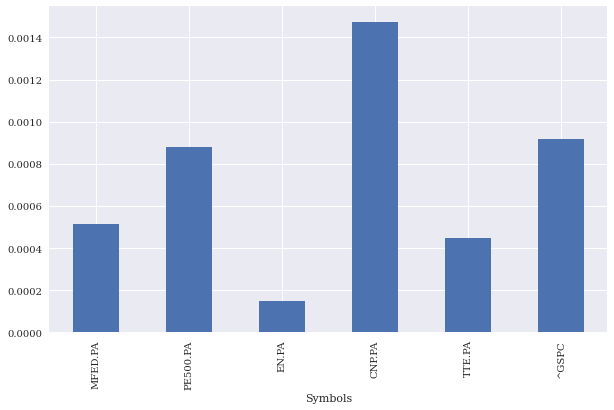

In [6]:
df.pct_change().mean().plot(kind="bar", figsize=(10, 6))

In [7]:
rets = np.log(df / df.shift(1))
rets.tail().round(2)

Symbols,MFED.PA,PE500.PA,EN.PA,CNP.PA,TTE.PA,^GSPC
Date,,,,,,
2021-12-06,0.01,0.01,0.02,0.0,0.03,0.01
2021-12-07,0.03,0.03,0.00,0.0,0.02,0.02
2021-12-08,-0.01,-0.01,-0.01,0.0,-0.00,0.00
2021-12-09,-0.00,0.01,-0.01,0.0,-0.01,NaN
2021-12-10,-0.00,-0.01,-0.00,-0.0,0.00,NaN


<AxesSubplot:xlabel='Date'>

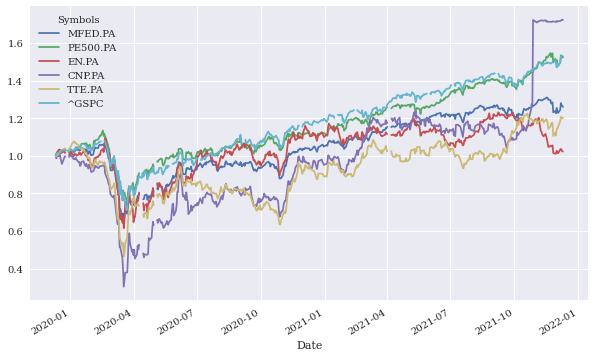

In [8]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

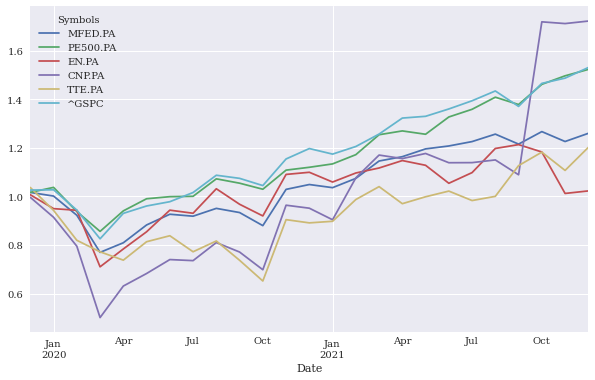

In [14]:
(rets
    .cumsum()
    .apply(np.exp)
    .resample("1m", label="right")
    .last()
    .plot(figsize=(10, 6))
)

<AxesSubplot:xlabel='Date'>

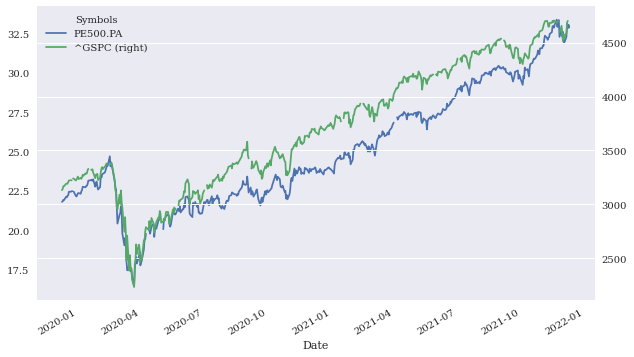

In [10]:
df[["PE500.PA", "^GSPC"]].plot(figsize=(10, 6), secondary_y="^GSPC")